<a href="https://colab.research.google.com/github/Afrinnn123/CVPR/blob/main/Mid/assignment_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification Using Cifar-10 Dataset:**

In [ ]:
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [ ]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
TRAIN_DIR='/content/CIFAR-10-images/test'

In [ ]:
CATEGORIES=os.listdir(TRAIN_DIR)
TRAIN_DATA=[]

In [ ]:
for c in CATEGORIES:
  path=os.path.join(TRAIN_DIR,c)
  class_num = CATEGORIES.index(c)
  image_files = os.listdir(path)

  for img in tqdm (image_files):
    img_path = os.path.join(path,img)
    img_arr = cv.imread(img_path)
    image_gray = cv.cvtColor(img_arr,cv.COLOR_BGR2GRAY)
    TRAIN_DATA.append([image_gray,class_num])

100%|██████████| 1000/1000 [00:00<00:00, 12294.60it/s]


In [ ]:
random.shuffle(TRAIN_DATA)

In [ ]:
f0=TRAIN_DATA[0:2000]
f1=TRAIN_DATA[2000:4000]
f2=TRAIN_DATA[4000:6000]
f3=TRAIN_DATA[6000:8000]
f4=TRAIN_DATA[8000:10000]

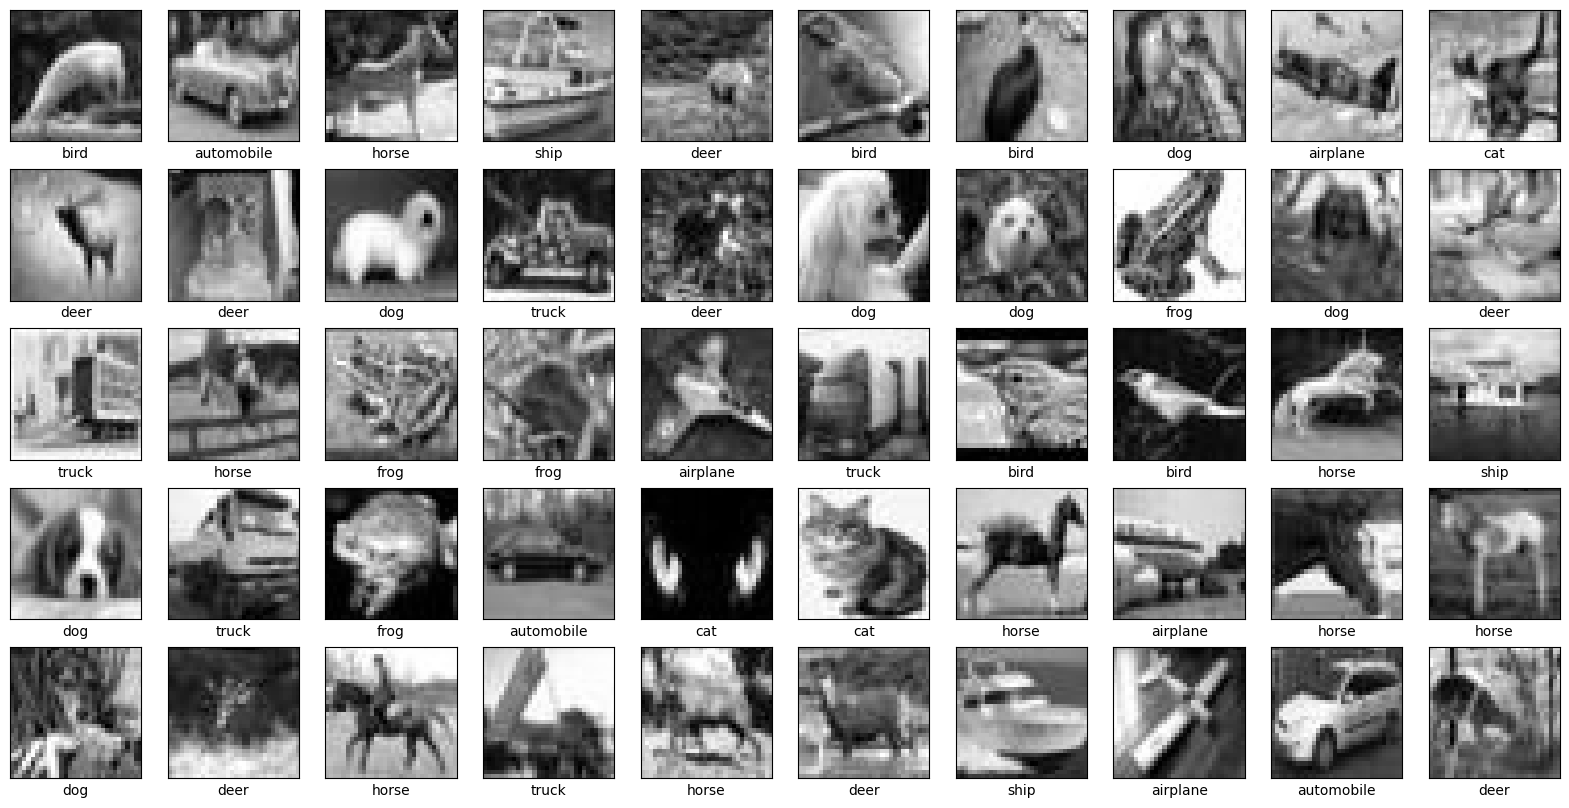

In [ ]:
plt.figure(figsize=(20,10))
for i in range (50):
  plt.subplot(5,10,i+1)
  image = TRAIN_DATA[i][0]
  plt.imshow(image,cmap='gray')
  plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()


In [ ]:
def l1_dist(x,y):
  return np.sum(np.abs(x-y))

def l2_dist(x,y):
  return np.sqrt(np.sum((x-y)**2))

def knn_classify(train_data, new_image, k, distance_func):
  distances=[]

  for item in train_data:
    train_image=item[0]
    label=item[1]
    distance=distance_func(new_image,train_image)
    distances.append((distance,label))

  distances.sort(key=lambda x:x[0])
  k_nearest =distances[:k]

  class_votes =[0]*len(CATEGORIES)
  for _, label in k_nearest:
    class_votes[label] +=  1

  predicted_class = np.argmax(class_votes)
  return predicted_class


In [ ]:
k_values=[1,3,5,7,9]

def cross_validation_k_values(data,k_values,distance_func):
  num_folds =5
  fold_size =len(data)//num_folds
  accuracies=[]
  for k in k_values:
    k_accuracies=[]

    for fold in range (num_folds):
      test_data = data[fold*fold_size :(fold+1)*fold_size]
      train_data = data[:fold*fold_size]+data[(fold+1)*fold_size:]

      correct_predictions=0

      for test_item in test_data:
        test_image = test_item[0]
        test_label = test_item[1]

        predicted_class = knn_classify(train_data, test_image, k, distance_func)
        if predicted_class == test_label:
           correct_predictions += 1

      accuracy = correct_predictions/len(test_data)
      k_accuracies.append(accuracy)

    k_mean_accuracy = np.mean(k_accuracies)
    accuracies.append((k, k_mean_accuracy))

  return accuracies

manhattan_accuracies = cross_validation_k_values(f0,k_values,l1_dist)
euclidean_accuracies = cross_validation_k_values(f0,k_values,l2_dist)

manhattan_accuracies = [accuracy for k , accuracy in manhattan_accuracies ]
euclidean_accuracies = [accuracy for k , accuracy in euclidean_accuracies ]








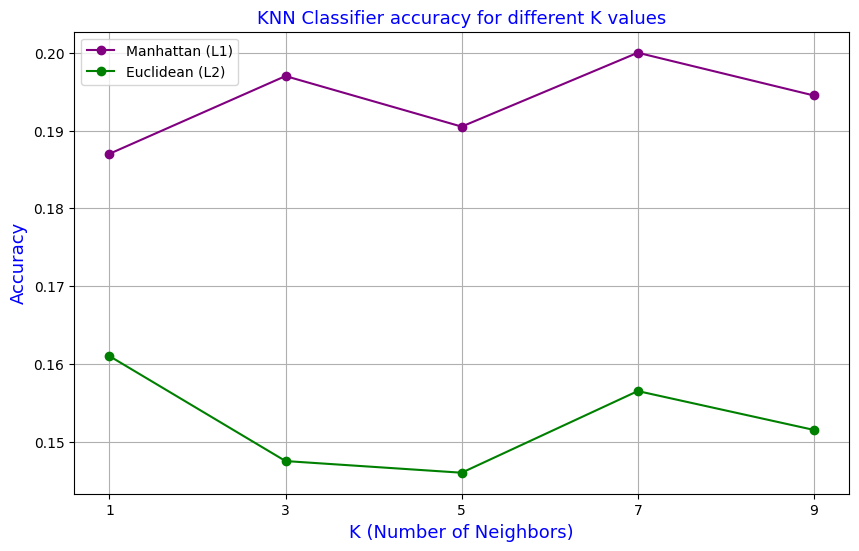

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(k_values,manhattan_accuracies , marker ='o', color='purple',label='Manhattan (L1)')
plt.plot(k_values,euclidean_accuracies , marker ='o', color='green',label='Euclidean (L2)')
plt.xlabel('K (Number of Neighbors)', color='blue',size='13')
plt.ylabel('Accuracy', color='blue',size='13')
plt.title('KNN Classifier accuracy for different K values' , color= 'blue', size='13')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import random
def display_top_predictions(test_image, k_values,distance_func):
  predicted_classes =[]

  for k in k_values:
    predicted_class = knn_classify(f0, test_image, k, distance_func)
    predicted_classes.append((k,predicted_class))
  predicted_classes.sort(key=lambda x:x[0])

  print("Top 5 predictions:")
  for k , predicted_class in predicted_classes[:5]:
    print(f"K={k}, Predicted class:{CATEGORIES[predicted_class]}")
test_image =random.choice(f0)[0]
display_top_predictions(test_image, k_values,l1_dist)



Top 5 predictions:
K=1, Predicted class:frog
K=3, Predicted class:horse
K=5, Predicted class:horse
K=7, Predicted class:dog
K=9, Predicted class:cat


True Label: bird
True Label: cat
True Label: horse
True Label: truck
True Label: horse
Best Manhattan Prediction K=1, Predicted Class=horse, Accuracy=100.00%
Best Euclidean Prediction K=1, Predicted Class=horse, Accuracy=100.00%



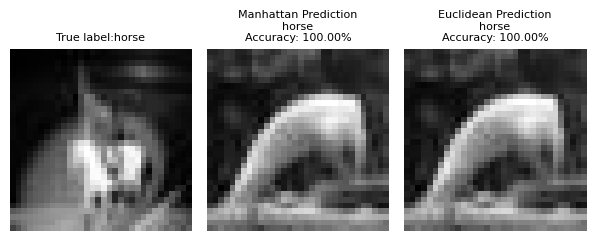

In [ ]:
num_test_images = 5
test_images = [(random.choice(f0)[0], random.choice(f0)[1]) for _ in range(num_test_images)]

best_manhattan_accuracy=0
best_euclidean_accuracy=0

for test_image, true_label in test_images:
  print(f"True Label: {CATEGORIES[true_label]}")
  best_manhattan_k=0
  best_manhattan_pred=-1
  best_manhattan_accuracy=-1
  best_euclidean_k=0
  best_euclidean_pred=-1
  best_euclidean_accuracy=-1

  for k in k_values:
    predicted_manhattan_class=knn_classify(f0, test_image, k,l1_dist)
    manhattan_accuracy = (predicted_manhattan_class==true_label).mean()*100
    predicted_euclidean_class=knn_classify(f0, test_image, k,l2_dist)
    euclidean_accuracy = (predicted_euclidean_class==true_label).mean()*100

    if manhattan_accuracy>best_manhattan_accuracy:
      best_manhattan_k=k
      best_manhattan_pred=predicted_manhattan_class
      best_manhattan_accuracy=manhattan_accuracy
    if euclidean_accuracy>best_euclidean_accuracy:
      best_euclidean_k=k
      best_euclidean_pred=predicted_euclidean_class
      best_euclidean_accuracy=euclidean_accuracy
print(f"Best Manhattan Prediction K={best_manhattan_k}, Predicted Class={CATEGORIES[best_manhattan_pred]}, Accuracy={best_manhattan_accuracy:.2f}%")
print(f"Best Euclidean Prediction K={best_euclidean_k}, Predicted Class={CATEGORIES[best_euclidean_pred]}, Accuracy={best_euclidean_accuracy:.2f}%")

print()

plt.figure(figsize=(10,6))
plt.subplot(1,5,1)
plt.imshow(test_image,cmap="gray")
plt.title(f"True label:{CATEGORIES[true_label]}",fontsize=8)
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(f0[best_manhattan_pred][0],cmap="gray")
plt.title(f"Manhattan Prediction\n{CATEGORIES[best_manhattan_pred]}\nAccuracy: {best_manhattan_accuracy:.2f}%", fontsize=8)
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(f0[best_euclidean_pred][0],cmap="gray")
plt.title(f"Euclidean Prediction\n{CATEGORIES[best_euclidean_pred]}\nAccuracy: {best_euclidean_accuracy:.2f}%", fontsize=8)
plt.axis("off")

plt.tight_layout()
plt.show()









**Discussion:** Using the CIFAR-10 dataset, the study evaluated how well Manhattan (L1) and Euclidean (L2) distances performed in image classification.  After testing a range of K values, it was discovered that the ideal K values balanced both local and global information. This led to the implementation of the k-nearest neighbours (k-NN) algorithm.
Depending on regardless of value of K was selected, the Manhattan (L1) and Euclidean (L2) distances performed differently. Because of its sensitivity to local variations and potential to outliers, Manhattan distance frequently performed better than Euclidean distance for smaller K values. But when K rose, Euclidean distance started to close the gap and even beat Manhattan in certain situations.
